Sophie Schulzen, Sofia Ellenberg, Vicente Zervino

Trabajo Practico N°3


In [1]:
import pandas as pd

In [2]:
#Parte 1

# Abrimos la base de datos
base_de_datos = 'usu_individual_T423.xlsx'

datos = pd.read_excel(base_de_datos)
print(datos)

                              CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  \
0      TQRMNOSUWHLMKQCDEFNFF00852219  2023          4          1           1   
1      TQRMNOSUWHLMKQCDEFNFF00852219  2023          4          1           2   
2      TQRMNOTXQHKOLMCDEGNFJ00794590  2023          4          1           1   
3      TQRMNOTXQHKOLMCDEGNFJ00794590  2023          4          1           2   
4      TQRMNOTXQHKOLMCDEGNFJ00794590  2023          4          1           3   
...                              ...   ...        ...        ...         ...   
47332  TQRMNORXTHLOLSCDEGJBF00853031  2023          4          1           1   
47333  TQRMNORXTHLOLSCDEGJBF00853031  2023          4          1           2   
47334  TQRMNORXTHLOLSCDEGJBF00853031  2023          4          1           3   
47335  TQRMNORXTHLOLSCDEGJBF00853031  2023          4          1           4   
47336  TQRMNOQWQHKMLNCDEIMBF00792561  2023          4          1           1   

       H15  REGION MAS_500  AGLOMERADO 

In [3]:
#Ejercicio 2.a.
#Eliminamos todas las observaciones que no corresponden a los aglomerados de Ciudad Autonoma de Buenos Aires o Gran Buenos Aires.
datos_limpios = datos[(datos['AGLOMERADO'] == 32) | (datos['AGLOMERADO'] == 33)]
print(datos_limpios)

                              CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  \
109    TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           1   
110    TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           2   
111    TQRMNOPUUHJKLQCDEIIAD00793187  2023          4          1           1   
112    TQRMNOPUUHJKLQCDEIIAD00793187  2023          4          1           2   
113    TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           1   
...                              ...   ...        ...        ...         ...   
45768  TQRMNOSRQHLMNSCDEIJAH00855730  2023          4          1           2   
45769  TQRMNOSRQHLMNSCDEIJAH00855730  2023          4          1           3   
45770  TQRMNOVTYHLMNUCDEIJAH00855731  2023          4          1           1   
45771  TQRMNOVTYHLMNUCDEIJAH00855731  2023          4          1           2   
45772  TQRMNOVTYHLMNUCDEIJAH00855731  2023          4          1           3   

       H15  REGION MAS_500  AGLOMERADO 

In [4]:
#Ejercicio 2.b. 
#Borramos las observaciones sin sentido. Por ejemplo; variables de ingreso que tengan valores negativos o edad negativa. 

#Primero vemos que variables tienen valores minimos negativos con el comando describe():
datos_limpios.describe()
chequeo = datos_limpios.describe()
minimos = chequeo.min()
# Filtramos las columnas con valores mínimos negativos para no olvidar ninguna. 
columnas_con_negativos = minimos[minimos < 0].index
print(columnas_con_negativos)

#Seleccionamos las variables que no deberian tener valores negativos. 
variables = ['ITF', 'DECIFR', 'IDECIFR', 'RDECIFR', 'GDECIFR', 'PDECIFR', 'ADECIFR', 'P21', 'DECOCUR', 'IDECOCUR', 'RDECOCUR', 
             'GDECOCUR', 'PDECOCUR', 'ADECOCUR', 'PONDIIO', 'IPCF', 'DECCFR', 'IDECCFR', 
             'RDECCFR', 'GDECCFR', 'PDECCFR', 'ADECCFR', 'PONDIH', 'P47T', 'DECINDR', 
             'IDECINDR', 'RDECINDR', 'GDECINDR', 'PDECINDR', 'ADECINDR', 'PONDII', 
             'V2_M', 'V3_M', 'V4_M', 'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V12_M', 
             'V18_M', 'V19_AM', 'V21_M', 'T_VI', 'CH06','PP06C', 'PP06D', 'PP08D1', 'PP08F1', 'PP08F2', 'PP08J1',
       'PP08J2', 'PP08J3', 'P21', 'TOT_P12', 'P47T' ]

# Eliminamos las filas que contienen valores negativos en al menos una columna de las variables seleccionadas
datos_limpios = datos_limpios[~(datos_limpios[variables] < 0).any(axis=1)]

# Mostrar las primeras filas del DataFrame resultante
print(datos_limpios)

Index(['CH06', 'PP06C', 'PP06D', 'PP08D1', 'PP08F1', 'PP08F2', 'PP08J1',
       'PP08J2', 'PP08J3', 'P21', 'TOT_P12', 'P47T', 'V2_M', 'V3_M', 'V4_M',
       'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V12_M', 'V18_M', 'V21_M',
       'T_VI'],
      dtype='object')
                              CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  \
109    TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           1   
110    TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           2   
111    TQRMNOPUUHJKLQCDEIIAD00793187  2023          4          1           1   
112    TQRMNOPUUHJKLQCDEIIAD00793187  2023          4          1           2   
113    TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           1   
...                              ...   ...        ...        ...         ...   
45768  TQRMNOSRQHLMNSCDEIJAH00855730  2023          4          1           2   
45769  TQRMNOSRQHLMNSCDEIJAH00855730  2023          4          1           3   
45770  TQRMNOVTY

In [5]:
import matplotlib.pyplot as plt

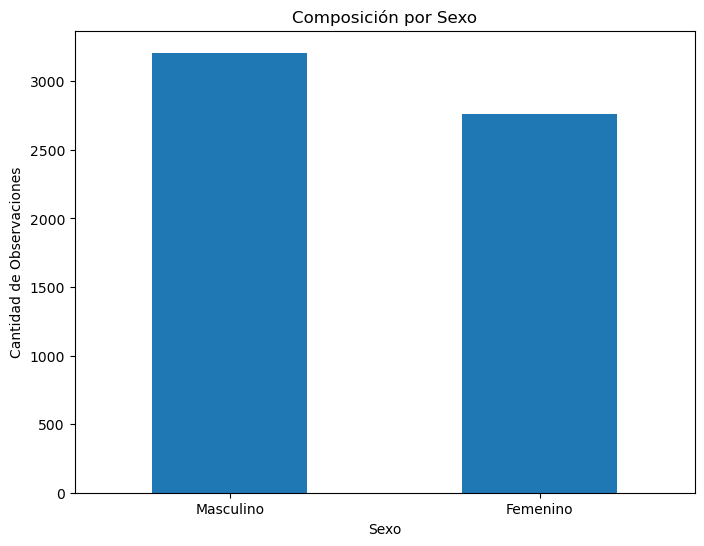

In [6]:
#Ejercicio 2.c. Realizamos un grafico de barras mostrando la composicion por sexo.

# Contamos la cantidad de observaciones por sexo
composicion_sexo = datos_limpios['CH04'].value_counts()

# Graficamos
plt.figure(figsize=(8, 6))
composicion_sexo.plot(kind='bar')  
plt.title('Composición por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Observaciones')
plt.xticks([0, 1], ['Masculino', 'Femenino'], rotation=0)
plt.show()

In [7]:
import seaborn as sns

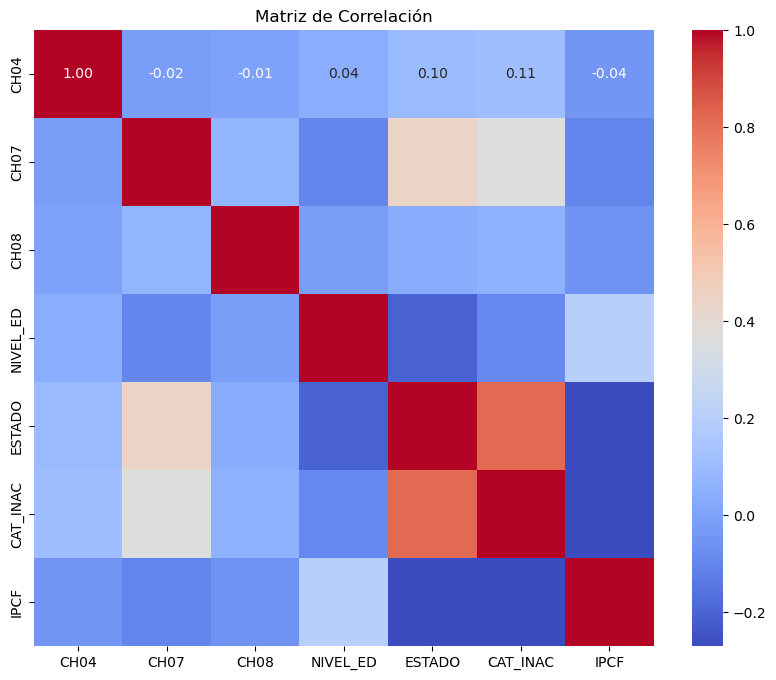

In [8]:
#Ejercicio 2.d. Hacemos la matriz de correlacion con las siguientes variables: CH04, CH07, CH08, NIVEL ED, ESTADO, CAT INAC, IPCF. 

# Seleccionamos las variables
variables = ['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']
datos_seleccionados = datos_limpios[variables]

# Creamos la matriz de correlación
matriz_correlacion = datos_seleccionados.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [9]:
#Ejercicio 2.e. 
#Sabiendo que de la variable ESTADO toma los valores:
#1 = Ocupado
#2 = Desocupado
#3 = Inactivo.  

# Calculamos el número de desocupados e inactivos
desocupados = datos_limpios[datos_limpios['ESTADO'] == 2].shape[0]
inactivos = datos_limpios[datos_limpios['ESTADO'] == 3].shape[0]

print("Desocupados:", desocupados)
print("Inactivos:", inactivos)

#Luego, calculamos la media de ingreso per capita familiar (IPCF) segun estado (ocupado, desocupado, inactivo)
media_por_estado = datos_limpios.groupby('ESTADO')['IPCF'].mean()

print("Media de IPCF según estado:")
print(media_por_estado)



Desocupados: 226
Inactivos: 2507
Media de IPCF según estado:
ESTADO
0         0.000000
1    190809.678283
2     61605.874425
3     93740.533139
4     75891.491137
Name: IPCF, dtype: float64


In [10]:
#Ejercicio 2.f

#Agregamos el archivo tabla adulto equiv.xlsx 
tabla_equiv = 'tabla_adulto_equiv.xlsx'
tabla = pd.read_excel(tabla_equiv)
print(tabla)

#Sin embargo, para hacer el ejercicio, no podemos lograr que la tabla se lea de manera correcta. Por ende, lo que haremos sera pasar los datos a mano y hacerlo a partir de esto. 


   Tabla de equivalencias de necesidades energéticas. Unidades de adulto equivalente, según sexo y edad  \
0                                                 NaN                                                     
1                                                 NaN                                                     
2                                                Edad                                                     
3                                                 NaN                                                     
4                                      Menor de 1 año                                                     
5                                                1año                                                     
6                                              2 años                                                     
7                                              3 años                                                     
8                                    

In [11]:
#Comenzamos pasando los datos. 
#Queremos agregar un columna a nuestra abse de datos llamada adulto_equiv. Para eso hacemos un diccionario por edad y por sexo. 

# Definimos el diccionario adulto_equiv copiando la tabla
adulto_equiv = {
    'lowerbound_edad': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 30, 46, 61, 76],
    'upperbound_edad': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 29, 45, 60, 75, 100],
    'Mujeres': [0.35, 0.37, 0.46, 0.51, 0.55, 0.60, 0.64, 0.66, 0.68, 0.69, 0.70, 0.72, 0.74, 0.76, 0.76, 0.77, 0.77, 0.77, 0.76, 0.77, 0.76, 0.67, 0.63],
    'Varones': [0.35, 0.37, 0.46, 0.51, 0.55, 0.60, 0.64, 0.66, 0.68, 0.69, 0.79, 0.82, 0.85, 0.9, 0.96, 1.00, 1.03, 1.04, 1.02, 1.00, 1.00, 0.83, 0.74]
}

# Creamos la base de datos tabla_equiv_creada a partir del diccionario adulto_equiv
tabla_equiv_creada = pd.DataFrame(adulto_equiv)
print(tabla_equiv_creada)

# De la base de datos "datos", sabemos que CH06 es la varibale para edad y CH04 es la variable para sexo. 
# Tenemos la funcion para buscar el equivalente entre estas variables. 
def get_adulto_equiv(edad, sexo):
    row = tabla_equiv_creada[(tabla_equiv_creada['lowerbound_edad'] <= edad) & (tabla_equiv_creada['upperbound_edad'] >= edad)]
    if not row.empty:
        if sexo == 1:  
            return row['Varones'].values[0]
        else: 
            return row['Mujeres'].values[0]
    else:
        return None  # Esto es por si no se encunetra ninguna coincidencia

# Ahora pasamos a crear a columa que se nos pide : 'adulto_equiv'. Primero hacemos la copia de la base de datos "datos_limpios" y luego sumamos la columa 
datos_limpios_copia = datos_limpios.copy()  
datos_limpios_copia['adulto_equiv'] = datos_limpios_copia.apply(lambda row: get_adulto_equiv(row['CH06'], row['CH04']), axis=1)
datos_limpios_copia['ad_equiv_hogar'] = datos_limpios_copia.groupby('CODUSU')['adulto_equiv'].transform('sum')

print(datos_limpios_copia[['CH06', 'CH04', 'adulto_equiv', 'ad_equiv_hogar']].head())


    lowerbound_edad  upperbound_edad  Mujeres  Varones
0                 0                0     0.35     0.35
1                 1                1     0.37     0.37
2                 2                2     0.46     0.46
3                 3                3     0.51     0.51
4                 4                4     0.55     0.55
5                 5                5     0.60     0.60
6                 6                6     0.64     0.64
7                 7                7     0.66     0.66
8                 8                8     0.68     0.68
9                 9                9     0.69     0.69
10               10               10     0.70     0.79
11               11               11     0.72     0.82
12               12               12     0.74     0.85
13               13               13     0.76     0.90
14               14               14     0.76     0.96
15               15               15     0.77     1.00
16               16               16     0.77     1.03
17        

In [12]:
#Ejericio 3  
#Nos enfocamos en la problematica de hogares que no reportan sus ingresos. Principalmente el Ingreso total familia (ITF). 


# Filtramos las observaciones donde ITF es NaN o 0
respondieron = datos_limpios[datos_limpios['ITF'].notna() & (datos_limpios['ITF'] > 0)].copy()
norespondieron = datos_limpios[datos_limpios['ITF'].isna() | (datos_limpios['ITF'] == 0)].copy()

# Verificamos cuántas personas no respondieron su ingreso total familiar
cuantos_no_respondieron = len(norespondieron)
print(f" {cuantos_no_respondieron} hogares no respondieron su ingreso total familiar")

# Guardar las observaciones en archivos separados
base_respondieron = 'respondieron.xlsx'
respondieron = datos_limpios_copia[datos_limpios_copia['ITF'].notna() & (datos_limpios_copia['ITF'] > 0)].copy()
respondieron.to_excel(base_respondieron, index=False)

base_norespondieron = 'norespondieron.xlsx'
norespondieron = datos_limpios_copia[datos_limpios_copia['ITF'].isna() | (datos_limpios_copia['ITF'] == 0)].copy()
norespondieron.to_excel(base_norespondieron, index=False)

print(f"Guardamos los datos en '{base_respondieron}' y '{base_norespondieron}'.")

 1618 hogares no respondieron su ingreso total familiar
Guardamos los datos en 'respondieron.xlsx' y 'norespondieron.xlsx'.


In [13]:
#Ejercicio 4 
# Vamos a utilizar la base respondieron asi que debemos verificar que este creada correctamente
# Cargar la base 'respondieron'
respondieron = pd.read_excel(base_respondieron)

# Verificar el contenido del DataFrame
print("Primeras filas del DataFrame 'respondieron':")
print(respondieron.head())

#Sabiendo que la Canasta Basica Total para un adulto equivalente en el cuarto trimestre de 2024 es aproximadamente $132.853, creamos
cesta_basica_total = 132853.3

# Agregamos a la base respondieron una columna llamada ingreso necesario que sea el producto de este valor por ad_equiv_hogar 
respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar'] * cesta_basica_total

# Guardamos la base de datos actualizada
respondieron.to_excel(base_respondieron, index=False)
print("Datos actualizados guardados en 'respondieron.xlsx'")
print(respondieron[['ad_equiv_hogar', 'ingreso_necesario']].head())




Primeras filas del DataFrame 'respondieron':
                          CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  H15  \
0  TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           1    1   
1  TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           2    1   
2  TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           1    1   
3  TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           2    1   
4  TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           3    1   

   REGION MAS_500  AGLOMERADO  PONDERA  ...       IPCF  DECCFR IDECCFR  \
0       1       S          32     1775  ...  225000.00       8     NaN   
1       1       S          32     1775  ...  225000.00       8     NaN   
2       1       S          32     3129  ...  266666.67       9     NaN   
3       1       S          32     3129  ...  266666.67       9     NaN   
4       1       S          32     3129  ...  266666.67       9     NaN   

   RDECCFR  GDECCFR  PD

In [14]:
#Ejercicio 5
#Agregamos a respondieron una columna llamada pobre que tome valor 1 si el ITF es menor al ingreso necesario que necesita esa familia, y 0 en caso contrario.

# Agregaamos la columna 'pobre' con la condicion
respondieron['pobre'] = (respondieron['ITF'] < respondieron['ingreso_necesario']).astype(int)

# Contamos cuántos individuos se clasifican como pobres
individuos_pobres = respondieron['pobre'].sum()

# Imprimimos la cantidad de individuos pobres identificados
print(f"Hay {individuos_pobres} individuos pobres.")


Hay 1732 individuos pobres.


In [15]:
#Parte 2
#1.
columnas_eliminar = [
    'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H',
    'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1',
    'PP08J2', 'PP08J3', 'P21', 'DECOCUR', 'IDECOCUR',
    'RDECOCUR', 'GDECOCUR', 'PDECOCUR', 'ADECOCUR',
    'PONDIIO', 'TOT_P12', 'P47T', 'DECINDR', 'IDECINDR',
    'RDECINDR', 'GDECINDR', 'PDECINDR', 'ADECINDR',
    'PONDII', 'V2_M', 'V3_M', 'V4_M', 'V5_M', 'V8_M',
    'V9_M', 'V10_M', 'V11_M', 'V12_M', 'V18_M',
    'V19_AM', 'V21_M', 'ITF', 'DECIFR', 'IDECIFR',
    'RDECIFR', 'GDECIFR', 'PDECIFR', 'ADECIFR',
    'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
    'PDECCFR', 'ADECCFR', 'PONDIH', 'adulto_equiv',
    'ad_equiv_hogar', 'ingreso_necesario'
]

respondieron = respondieron.drop(columnas_eliminar, axis=1)
columnas_eliminar = [
    'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H',
    'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1',
    'PP08J2', 'PP08J3', 'P21', 'DECOCUR', 'IDECOCUR',
    'RDECOCUR', 'GDECOCUR', 'PDECOCUR', 'ADECOCUR',
    'PONDIIO', 'TOT_P12', 'P47T', 'DECINDR', 'IDECINDR',
    'RDECINDR', 'GDECINDR', 'PDECINDR', 'ADECINDR',
    'PONDII', 'V2_M', 'V3_M', 'V4_M', 'V5_M', 'V8_M',
    'V9_M', 'V10_M', 'V11_M', 'V12_M', 'V18_M',
    'V19_AM', 'V21_M', 'ITF', 'DECIFR', 'IDECIFR',
    'RDECIFR', 'GDECIFR', 'PDECIFR', 'ADECIFR',
    'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
    'PDECCFR', 'ADECCFR', 'PONDIH', 'adulto_equiv',
    'ad_equiv_hogar'
]
norespondieron = norespondieron.drop(columnas_eliminar, axis=1)
print(respondieron)

                             CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  \
0     TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           1   
1     TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           2   
2     TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           1   
3     TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           2   
4     TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           3   
...                             ...   ...        ...        ...         ...   
4346  TQRMNOSRQHLMNSCDEIJAH00855730  2023          4          1           2   
4347  TQRMNOSRQHLMNSCDEIJAH00855730  2023          4          1           3   
4348  TQRMNOVTYHLMNUCDEIJAH00855731  2023          4          1           1   
4349  TQRMNOVTYHLMNUCDEIJAH00855731  2023          4          1           2   
4350  TQRMNOVTYHLMNUCDEIJAH00855731  2023          4          1           3   

      H15  REGION MAS_500  AGLOMERADO  PONDERA  ...

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#2.
#Partimos la base en train y test
respondieron_train, respondieron_test = train_test_split(respondieron, test_size = 0.3, random_state = 101)

In [18]:
# Separamos en variable pobre y vector de variables explicativas, agregamos la constante
pobre_train = respondieron_train.pobre
x_train = respondieron_train.drop(columns= "pobre")
x_train["cons"] = 1

In [19]:
pobre_test = respondieron_test.pobre
x_test = respondieron_test.drop(columns= "pobre")
x_test["cons"] = 1

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from datetime import datetime
from sklearn.preprocessing import StandardScaler

In [21]:
# Buscamos las columnas no numéricas para evaluar si usarlas o no, y cómo hacerlo
non_numeric_columns = x_train.select_dtypes(include=['object']).columns
print(non_numeric_columns)
print(x_train[non_numeric_columns].head())

Index(['CODUSU', 'MAS_500', 'CH05', 'PP09A_ESP'], dtype='object')
                             CODUSU MAS_500                 CH05 PP09A_ESP
3225  TQRMNOPSYHKLSLCDEIJAH00792402       S  1965-12-26 00:00:00       NaN
3179  TQRMNOQRYHKLTSCDEIJAH00792120       S  1958-02-21 00:00:00       NaN
3990  TQRMNOTVRHJMLPCDEIIAD00796075       S  1978-11-22 00:00:00       NaN
299   TQRMNORTQHLMOQCDEIJAH00855027       S  1968-02-15 00:00:00       NaN
3893  TQRMNOPRRHMKOMCDEIJAH00812405       S  1977-07-15 00:00:00       NaN


In [22]:
# Consideramos las variables que no son numéricas y decidimos reemplazar dos y eliminar dos
# Eliminamos las columnas 'CODUSU' y 'PP09A_ESP' porque son códigos únicos de las observaciones
x_train = x_train.drop(columns=['CODUSU', 'PP09A_ESP'])
x_test = x_test.drop(columns=['CODUSU', 'PP09A_ESP'])

# Reemplazamos los valores en la columna 'MAS_500' como dummy numérica
x_train['MAS_500'] = x_train['MAS_500'].map({'S': 1, 'N': 0})
x_test['MAS_500'] = x_test['MAS_500'].map({'S': 1, 'N': 0})

# Convertimos la columna 'CH05' en edad. Antes era la fecha de nacimiento
def calculate_age(birthdate):
    today = datetime.today()
    if isinstance(birthdate, str):
        birthdate = datetime.strptime(birthdate, "%Y-%m-%d")
    return today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))

x_train['CH05'] = x_train['CH05'].apply(calculate_age)
x_test['CH05'] = x_test['CH05'].apply(calculate_age)

In [23]:
pd.set_option('display.max_rows', None)

# Obtuvimos el resumen de los missings
missing_values = x_train.isna().sum()
print(missing_values)

ANO4             0
TRIMESTRE        0
NRO_HOGAR        0
COMPONENTE       0
H15              0
REGION           0
MAS_500          0
AGLOMERADO       0
PONDERA          0
CH03             0
CH04             0
CH05             0
CH06             0
CH07             0
CH08             0
CH09             0
CH10             0
CH11             0
CH12             0
CH13             0
CH14          1512
CH15             0
CH15_COD      2452
CH16             0
CH16_COD      2986
NIVEL_ED         0
ESTADO           0
CAT_OCUP         0
CAT_INAC         0
IMPUTA        3037
PP02C1           0
PP02C2           0
PP02C3           0
PP02C4           0
PP02C5           0
PP02C6           0
PP02C7           0
PP02C8           0
PP02E            0
PP02H            0
PP02I            0
PP03C         1654
PP03D         1654
PP3E_TOT      1654
PP3F_TOT      1654
PP03G         1654
PP03H         1654
PP03I         1654
PP03J         1654
INTENSI       1654
PP04A         1654
PP04B_COD     1654
PP04B1      

In [24]:
# Se eliminan todas las variables con missings, dado que son preguntas para los subgrupos de ocupados, independientes, desocupados, etc. dependiendo el caso, porque no tiene sentido predecir valores para los missings.
x_train = x_train.dropna(axis=1)
x_test = x_test.dropna(axis=1)

In [25]:
# Estandarización de los datos
scaler = StandardScaler()

x_train_estand = scaler.fit_transform(x_train)
x_test_estand = scaler.transform(x_test)

In [26]:
# Modelo logit
logit_model = LogisticRegression()
logit_model.fit(x_train_estand, pobre_train)
logit_proba = logit_model.predict_proba(x_test_estand)[:, 1]
logit_pred = logit_model.predict(x_test_estand)
logit_cm = confusion_matrix(pobre_test, logit_pred)
logit_auc = roc_auc_score(pobre_test, logit_proba)
logit_accuracy = accuracy_score(pobre_test, logit_pred)

# Modelo LDA
lda_model = LDA()
lda_model.fit(x_train_estand, pobre_train)
lda_proba = lda_model.predict_proba(x_test_estand)[:, 1]
lda_pred = lda_model.predict(x_test_estand)
lda_cm = confusion_matrix(pobre_test, lda_pred)
lda_auc = roc_auc_score(pobre_test, lda_proba)
lda_accuracy = accuracy_score(pobre_test, lda_pred)

# Modelo KNN con k=3
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train_estand, pobre_train)
knn_proba = knn_model.predict_proba(x_test_estand)[:, 1]
knn_pred = knn_model.predict(x_test_estand)
knn_cm = confusion_matrix(pobre_test, knn_pred)
knn_auc = roc_auc_score(pobre_test, knn_proba)
knn_accuracy = accuracy_score(pobre_test, knn_pred)

In [27]:
# Calculamos los falsos positivos y falsos negativos
logit_fpr, logit_tpr, _ = roc_curve(pobre_test, logit_proba)
lda_fpr, lda_tpr, _ = roc_curve(pobre_test, lda_proba)
knn_fpr, knn_tpr, _ = roc_curve(pobre_test, knn_proba)

Logit:
Matriz de confusion:
 [[656 130]
 [203 317]]
AUC: 0.7936337835192796
Accuracy: 0.7450229709035222

LDA:
Matriz de confusion:
 [[648 138]
 [211 309]]
AUC: 0.7873434135838715
Accuracy: 0.7327718223583461

KNN:
Matriz de confusion:
 [[619 167]
 [226 294]]
AUC: 0.7278711587394793
Accuracy: 0.6990811638591118


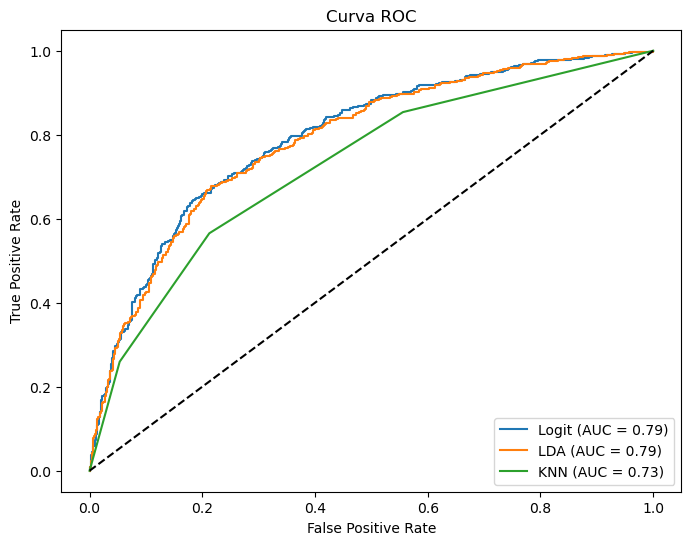

In [28]:
# Resultados
print("Logit:")
print("Matriz de confusion:\n", logit_cm)
print("AUC:", logit_auc)
print("Accuracy:", logit_accuracy)

print("\nLDA:")
print("Matriz de confusion:\n", lda_cm)
print("AUC:", lda_auc)
print("Accuracy:", lda_accuracy)

print("\nKNN:")
print("Matriz de confusion:\n", knn_cm)
print("AUC:", knn_auc)
print("Accuracy:", knn_accuracy)

# Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(logit_fpr, logit_tpr, label='Logit (AUC = {:.2f})'.format(logit_auc))
plt.plot(lda_fpr, lda_tpr, label='LDA (AUC = {:.2f})'.format(lda_auc))
plt.plot(knn_fpr, knn_tpr, label='KNN (AUC = {:.2f})'.format(knn_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


In [29]:
# 5.
#Acomodamos la base de norespondieron para que sea como respondieron (para que tenga las mismas variables)
norespondieron = norespondieron.drop(columns=['CODUSU', 'PP09A_ESP'])
norespondieron['MAS_500'] = norespondieron['MAS_500'].map({'S': 1, 'N': 0})
norespondieron['CH05'] = norespondieron['CH05'].apply(calculate_age)
norespondieron = norespondieron.dropna(axis=1)

In [30]:
# Agregamos la constante
norespondieron_copy = norespondieron.copy()
norespondieron_copy["cons"] = 1

In [31]:
# Estandarización de los datos
norespondieron_estand = scaler.fit_transform(norespondieron_copy)

In [32]:
# Predecimos la pobreza de la base norespondieron con el modelo logit, que tuvo los mejores indicadores
predict_norespondieron = logit_model.predict(norespondieron_copy)

C:\Users\vicen\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [33]:
#Calculamos la proporción de pobres
proporcion_pobres = sum(predict_norespondieron) / len(predict_norespondieron)

# Imprimimos la proporción de pobres
print("Proporción de pobres en la predicción:", proporcion_pobres)

Proporción de pobres en la predicción: 0.8028430160692213


In [34]:
#6.
# Eliminamos las variables
x_train = x_train.drop(columns=['PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E'])
x_test = x_test.drop(columns=['PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E'])

In [35]:
# Estandarización de los datos
scaler = StandardScaler()

x_train_estand = scaler.fit_transform(x_train)
x_test_estand = scaler.transform(x_test)

In [36]:
# Modelo logit
logit_model = LogisticRegression()
logit_model.fit(x_train_estand, pobre_train)
logit_proba = logit_model.predict_proba(x_test_estand)[:, 1]
logit_pred = logit_model.predict(x_test_estand)
logit_cm = confusion_matrix(pobre_test, logit_pred)
logit_auc = roc_auc_score(pobre_test, logit_proba)
logit_accuracy = accuracy_score(pobre_test, logit_pred)

In [37]:
# Resultados
print("Logit:")
print("Matriz de confusion:\n", logit_cm)
print("AUC:", logit_auc)
print("Accuracy:", logit_accuracy)

Logit:
Matriz de confusion:
 [[657 129]
 [203 317]]
AUC: 0.7945390487375221
Accuracy: 0.7457886676875957
